In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=6)

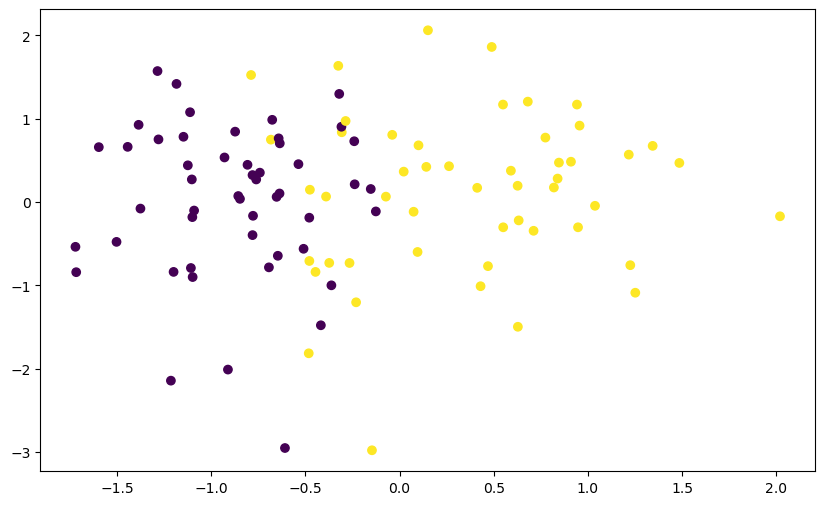

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y)

# Perceptron: 

In [4]:
class Perceptron:
    def __init__(self,learning_rate):
        self.lr = learning_rate
        self.intercept = None
        self.coeff = None
        
    def step(self,x):
        return 1 if x>0 else 0
        
    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,1)
        w = np.ones(x_train.shape[1])

        for i in range(1000):
            idx = np.random.randint(0,x_train.shape[0])
            y_hat = self.step(np.dot(x_train[idx],w))
            w = w + self.lr*(y_train[idx] - y_hat)*(x_train[idx])
        self.intercept = w[0]
        self.coeff = w[1:]
        
    def predict(self,x_test):
        y_p = np.zeros(x_test.shape[0])
        for i in range(x_test.shape[0]):
            if (np.dot(self.coeff,x_test[i]) + self.intercept)>=0:
                y_p[i] = 1
            else:
                y_p[i] = 0
        return y_p

In [5]:
perceptron = Perceptron(learning_rate = 0.5)

In [6]:
perceptron.fit(X,y)

In [7]:
y_perceptron_predict = perceptron.predict(X)

In [8]:
m_perceptron = -(perceptron.coeff[0]/perceptron.coeff[1])
c_perceptron = -(perceptron.intercept/perceptron.coeff[1])

In [9]:
y_perceptron_predict.sum(), y.sum()

(54.0, 50)

# Sigmoid:

In [10]:
class Sigmoid:
    def __init__(self,learning_rate):
        self.lr = learning_rate
        self.intercept = None
        self.coeff = None
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
        
    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,1)
        w = np.ones(x_train.shape[1])

        for i in range(1000):
            idx = np.random.randint(0,x_train.shape[0])
            y_hat = self.sigmoid(np.dot(x_train[idx],w))
            w = w + self.lr*(y_train[idx] - y_hat)*(x_train[idx])
        self.intercept = w[0]
        self.coeff = w[1:]
        
    def predict(self,x_test):
        y_p = np.zeros(x_test.shape[0])
        for i in range(x_test.shape[0]):
            if (np.dot(self.coeff,x_test[i]) + self.intercept)>=0:
                y_p[i] = 1
            else:
                y_p[i] = 0
        return y_p

In [11]:
sigmoid_reg = Sigmoid(learning_rate = 0.5)

In [12]:
sigmoid_reg.fit(X,y)

In [13]:
y_sigmoid_predict = sigmoid_reg.predict(X)

In [14]:
m_sigmoid = -(sigmoid_reg.coeff[0]/sigmoid_reg.coeff[1])
c_sigmoid = -(sigmoid_reg.intercept/sigmoid_reg.coeff[1])

In [15]:
y_sigmoid_predict.sum(), y.sum()

(54.0, 50)

# Logistic Regression Class:

In [16]:
class Logistic:
    def __init__(self,learning_rate):
        self.lr = learning_rate
        self.intercept = None
        self.coeff = None
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,1)
        w = np.ones(x_train.shape[1])

        for i in range(5000):
    # idx = np.random.randint(0,x_train.shape[0])
            y_hat = self.sigmoid(np.dot(x_train,w))
            slope = (-1/x_train.shape[0])*np.dot(y_train-y_hat, x_train)
            w = w - self.lr*slope
        self.intercept = w[0]
        self.coeff = w[1:]
        
    def predict(self,x_test):
        y_p = np.zeros(x_test.shape[0])
        for i in range(x_test.shape[0]):
            if (np.dot(self.coeff,x_test[i]) + self.intercept)>=0:
                y_p[i] = 1
            else:
                y_p[i] = 0
        return y_p

In [17]:
logistic_reg = Logistic(learning_rate = 0.5)

In [18]:
logistic_reg.fit(X,y)

In [19]:
y_logistic_predict = logistic_reg.predict(X)

In [20]:
m_logistic = -(logistic_reg.coeff[0]/logistic_reg.coeff[1])
c_logistic = -(logistic_reg.intercept/logistic_reg.coeff[1])

In [21]:
y_logistic_predict.sum(), y.sum()

(50.0, 50)

# Logistic Regression:

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none',solver='sag')

In [23]:
lr.fit(X,y)

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [24]:
y_Logistic_predict = lr.predict(X)

In [25]:
m_Logistic = -(lr.coef_[0][0]/lr.coef_[0][1])
c_Logistic = -(lr.intercept_/lr.coef_[0][1])

In [26]:
y_Logistic_predict.sum(), y.sum()

(50, 50)

# Plot: 

In [27]:
x_input = np.linspace(-3,3,100)
y_perceptron = m_perceptron*x_input + c_perceptron
y_sigmoid = m_sigmoid*x_input + c_sigmoid
y_logistic = m_logistic*x_input + c_logistic
y_Logistic = m_Logistic*x_input + c_Logistic

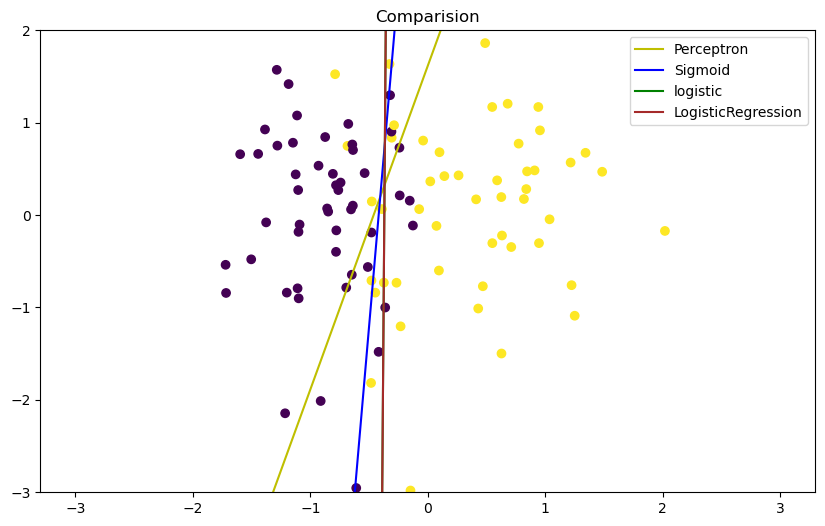

In [28]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_perceptron, color='y', label='Perceptron')
plt.plot(x_input,y_sigmoid, color='b', label='Sigmoid')
plt.plot(x_input,y_logistic, color='g', label='logistic')
plt.plot(x_input,y_Logistic, color='brown', label='LogisticRegression')
plt.scatter(X[:,0], X[:,1], c=y)
# plt.xlim([-2,2])
plt.ylim([-3,2])
plt.title('Comparision')
plt.legend()
plt.show()

In [29]:
lr.coef_, lr.intercept_

(array([[ 5.76841083, -0.03441065]]), array([2.13207779]))